In [1]:
from root_pandas import read_root
import pdg
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/00


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [3]:
from PyFastBDT import FastBDT

In [8]:
data = read_root('../mc/exp55_run50_train.root', 'lambda')

In [9]:
data.shape

(437417, 38)

In [10]:
data.columns

Index(['__experiment__', '__run__', '__event__', '__candidate__',
       '__ncandidates__', '__weight__', 'M', 'p', 'chiProb', 'cosa', 'cosaXY',
       'dr', 'dz', 'distance', 'significanceOfDistance', 'min_dr',
       'goodBelleLambda', 'isSignal', 'genMotherPDG', 'IPX', 'IPY', 'IPZ',
       'p_pid_ppi', 'p_pid_pk', 'p_pid_kpi', 'p_dr', 'p_dz', 'p_p',
       'p_isSignal', 'p_genMotherPDG', 'pi_pid_ppi', 'pi_pid_pk', 'pi_pid_kpi',
       'pi_dr', 'pi_dz', 'pi_p', 'pi_isSignal', 'pi_genMotherPDG'],
      dtype='object')

In [11]:
data.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,p,chiProb,cosa,...,p_isSignal,p_genMotherPDG,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_dr,pi_dz,pi_p,pi_isSignal,pi_genMotherPDG
0,55,7,8,0,1,1.0,1.165105,0.490118,0.000000e+00,-0.947015,...,0.0,113.0,0.001,0.001000,0.001,18.428707,86.226101,0.215878,1.0,-321.0
1,55,7,17,0,1,1.0,1.127725,0.394250,0.000000e+00,0.846915,...,0.0,421.0,0.001,0.001000,0.001,30.917240,16.672331,0.153996,0.0,-211.0
2,55,7,16,0,1,1.0,1.117808,0.847351,0.000000e+00,-0.993323,...,0.0,-411.0,0.001,0.001000,0.001,27.059559,33.095623,0.186119,0.0,113.0
3,55,7,25,0,1,1.0,1.117568,0.864626,2.421974e-01,0.995793,...,1.0,-3122.0,0.001,0.018339,0.001,0.605767,1.253609,0.079810,1.0,-3122.0
4,55,7,44,0,2,1.0,1.110521,1.165721,1.490779e-18,-0.017120,...,0.0,310.0,0.001,0.001000,0.001,1.732089,-0.183578,0.265781,0.0,211.0


In [12]:
train, test, _, _ = train_test_split(data, data.isSignal, test_size = 0.5, stratify = data.isSignal)

In [37]:
features = ['chiProb', 'cosaXY', 'dr', 
            'p_pid_pk', 'p_pid_ppi']

In [38]:
bdt = FastBDT.Classifier(nTrees = 200, depth = 3)
bdt.fit(train[features], train.isSignal)

In [39]:
test.loc[:, 'mva'] = bdt.predict(test[features])
train.loc[:, 'mva'] = bdt.predict(train[features])

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
train.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,p,chiProb,cosa,...,p_genMotherPDG,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_dr,pi_dz,pi_p,pi_isSignal,pi_genMotherPDG,mva
331198,55,38,73009,0,1,1.0,1.350470,1.427011,0.000000,-0.961874,...,213.0,0.001,0.039792,0.001,62.277596,109.267603,0.143281,1.0,211.0,0.006681
83756,55,28,231771,0,1,1.0,1.112953,0.453053,0.000000,-0.885752,...,-323.0,0.001,0.011682,0.001,62.042861,38.767896,0.158563,1.0,211.0,0.010690
206490,55,34,66523,0,1,1.0,1.093811,0.519062,0.000000,-0.951059,...,-511.0,0.001,0.001000,0.001,7.726529,3.108806,0.139871,1.0,-431.0,0.006584
355240,55,40,275595,0,1,1.0,1.106630,0.622804,0.000775,0.810952,...,113.0,0.001,0.001000,0.001,0.584684,1.247027,0.127918,1.0,223.0,0.000009
156811,55,43,183952,1,2,1.0,1.117053,2.247597,0.567843,0.999550,...,-3122.0,0.001,0.001000,0.001,11.901635,7.351920,0.222324,1.0,-3122.0,0.998020


In [41]:
test.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,p,chiProb,cosa,...,p_genMotherPDG,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_dr,pi_dz,pi_p,pi_isSignal,pi_genMotherPDG,mva
426992,55,46,38816,0,1,1.0,1.116467,1.636288,0.912908,0.999940,...,-3122.0,0.001,0.001000,0.001,10.701714,13.299955,0.272334,1.0,-3122.0,0.993998
128476,55,40,220291,0,1,1.0,1.115761,1.046922,0.084659,0.999077,...,-3122.0,0.001,0.001000,0.001,2.702360,-0.181352,0.247541,1.0,-3122.0,0.998564
303788,55,32,97625,0,1,1.0,1.084322,0.581563,0.000000,-0.921038,...,211.0,0.001,0.005619,0.001,50.840354,-17.795596,0.116498,0.0,211.0,0.008337
75593,55,28,114203,0,2,1.0,1.189277,0.688400,0.000000,-0.958049,...,10331.0,0.001,0.001000,0.001,10.269485,107.016943,0.150814,0.0,-3122.0,0.015203
63135,55,24,7873,1,2,1.0,1.112098,1.147348,0.144364,0.999618,...,-3122.0,0.001,0.001000,0.001,0.436698,0.593134,0.175321,1.0,-3122.0,0.995333


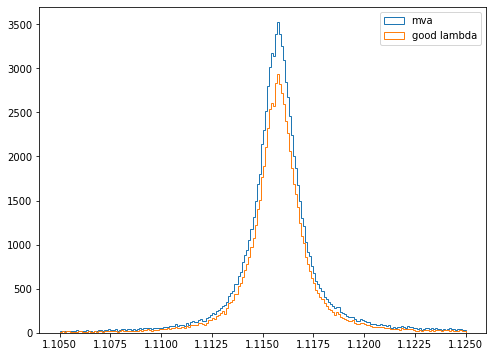

In [42]:
# plt.hist(test.M, range = [1.105, 1.125], bins = 200)
plt.figure(figsize = (8, 6))
plt.hist(test[test.mva > 0.96].M, range = [1.105, 1.125], bins = 200, histtype = 'step', label = 'mva')
plt.hist(test[(test.goodBelleLambda > 1) & (test.p_pid_ppi > 0.6)].M, range = [1.105, 1.125], bins = 200, histtype = 'step', label = 'good lambda')
plt.legend()
plt.show()

In [43]:
roc_auc_score(test.isSignal, test.mva), roc_auc_score(train.isSignal, train.mva)

(0.9952606192705937, 0.9953956247373927)

In [44]:
importance_dict = bdt.internFeatureImportance()
for idx, name in enumerate(features):
    print(f'{name:30} {importance_dict[idx]}')

chiProb                        0.016836811696287646
cosaXY                         0.12353260078598595
dr                             0.02830786803268358
p_pid_pk                       0.6157126256830718
p_pid_ppi                      0.21561009380197096
